representation for the false gray and pure gray scale.

calculate_z_serial_purepython took 10.785469055175781 seconds
Images saved:
C:\Users\Fatim\Downloads\part1\Portfolio_of_evidence\Part1_Benchmarking_and_Profiling\julia_false_grayscale.png
C:\Users\Fatim\Downloads\part1\Portfolio_of_evidence\Part1_Benchmarking_and_Profiling\julia_pure_grayscale.png


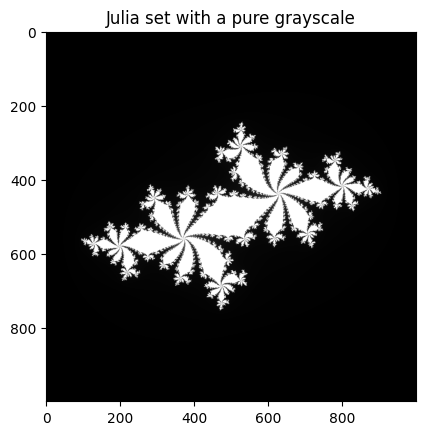

In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Defining global constants for the coordinate space
x1, x2, y1, y2 = -1.8, 1.8, -1.8, 1.8
c_real, c_imag = -0.62772, -0.42193

def calc_pure_python(desired_width, max_iterations):
    """Create a list of complex coordinates (zs) and complex parameters (cs), 
    build Julia set."""
    x_step = (x2 - x1) / desired_width
    y_step = (y1 - y2) / desired_width
    x = []
    y = []
    ycoord = y2
    while ycoord > y1:
        y.append(ycoord)
        ycoord += y_step
    xcoord = x1
    while xcoord < x2:
        x.append(xcoord)
        xcoord += x_step

    # Build a list of coordinates and the initial condition for each cell.
    zs = [complex(xcoord, ycoord) for ycoord in y for xcoord in x]
    # Build a list of complex parameters
    cs = [complex(c_real, c_imag) for _ in zs]

    start_time = time.time()
    output = calculate_z_serial_purepython(max_iterations, zs, cs)
    end_time = time.time()
    secs = end_time - start_time
    print(calculate_z_serial_purepython.__name__ + " took", secs, "seconds")

    # This sum is expected for a 1000^2 grid with 300 iterations
    # It ensures that our code evolves exactly as we'd intended
    assert sum(output) == 33219980

    return output

def calculate_z_serial_purepython(maxiter, zs, cs):
    """Calculate output list using Julia update rule"""
    output = [0] * len(zs)
    for i in range(len(zs)):
        n = 0
        z = zs[i]
        c = cs[i]
        while abs(z) < 2 and n < maxiter:
            z = z * z + c
            n += 1
        output[i] = n
    return output

# Calculate the Julia set using a pure Python solution
desired_width = 1000
max_iterations = 300
output = calc_pure_python(desired_width, max_iterations)

# Normalize the output
normalized_output = [float(i) / max_iterations for i in output]

# Reshape the normalized output to a 2D array for plotting
julia_set = np.reshape(normalized_output, (desired_width, desired_width))

# Creating the false grayscale image
plt.imshow(julia_set, cmap='gray')
plt.title("Julia set with a false grayscale")
false_grayscale_path = 'C:\\Users\\Fatim\\Downloads\\part1\\Portfolio_of_evidence\\Part1_Benchmarking_and_Profiling\\julia_false_grayscale.png'
plt.savefig(false_grayscale_path)
plt.clf()  # Clear the figure for the next plot

# Creating the pure grayscale image using a linear color map
linear_cmap = LinearSegmentedColormap.from_list('linear_gray', [(0, 'black'), (1, 'white')])
plt.imshow(julia_set, cmap=linear_cmap)
plt.title("Julia set with a pure grayscale")
pure_grayscale_path = 'C:\\Users\\Fatim\\Downloads\\part1\\Portfolio_of_evidence\\Part1_Benchmarking_and_Profiling\\julia_pure_grayscale.png'
plt.savefig(pure_grayscale_path)

print("Images saved:")
print(false_grayscale_path)
print(pure_grayscale_path)

timefn function

In [4]:
from functools import wraps

def timefn(fn):
    """
    A decorator that prints the time a function takes to execute.
    """
    @wraps(fn)
    def measure_time(*args, **kwargs):
        t1 = time.time()
        result = fn(*args, **kwargs)
        t2 = time.time()
        print(f"@timefn: {fn.__name__} took {t2 - t1} seconds")
        return result
    return measure_time

# Decorate the calculate_z_serial_purepython function with the @timefn decorator
@timefn
def calculate_z_serial_purepython(maxiter, zs, cs):
    """Calculate output list using Julia update rule"""
    output = [0] * len(zs)
    for i in range(len(zs)):
        n = 0
        z = zs[i]
        c = cs[i]
        while abs(z) < 2 and n < maxiter:
            z = z * z + c
            n += 1
        output[i] = n
    return output

# Let's test the decorated function with a smaller set to quickly see the timing information.
# We will call this function with smaller parameters since we're just testing the time decorator.
test_output = calculate_z_serial_purepython(10, [complex(0, 0)], [complex(c_real, c_imag)])
test_output

@timefn: calculate_z_serial_purepython took 0.0 seconds


[10]

 timeit module

In [7]:
def generate_zs_cs(width, x1, x2, y1, y2, c_real, c_imag):
    x_step = (float(x2) - float(x1)) / width
    y_step = (float(y1) - float(y2)) / width
    zs = []
    cs = []
    for ycoord in range(width):
        for xcoord in range(width):
            zs.append(complex(x1 + xcoord * x_step, y1 - ycoord * y_step))
            cs.append(complex(c_real, c_imag))
    return zs, cs


In [8]:
# Global constants for the Julia set
x1, x2, y1, y2 = -1.8, 1.8, -1.8, 1.8
c_real, c_imag = -0.62772, -0.42193

# We need to generate the zs and cs lists before timing
desired_width = 1000  # The size of the grid you want
zs, cs = generate_zs_cs(desired_width, x1, x2, y1, y2, c_real, c_imag)


In [9]:
%timeit -r 5 -n 10 calculate_z_serial_purepython(max_iterations, zs, cs)

@timefn: calculate_z_serial_purepython took 10.91836166381836 seconds
@timefn: calculate_z_serial_purepython took 10.180820226669312 seconds
@timefn: calculate_z_serial_purepython took 10.923223972320557 seconds
@timefn: calculate_z_serial_purepython took 10.543084621429443 seconds
@timefn: calculate_z_serial_purepython took 11.087406396865845 seconds
@timefn: calculate_z_serial_purepython took 12.446754693984985 seconds
@timefn: calculate_z_serial_purepython took 11.526713609695435 seconds
@timefn: calculate_z_serial_purepython took 11.322718858718872 seconds
@timefn: calculate_z_serial_purepython took 11.747592687606812 seconds
@timefn: calculate_z_serial_purepython took 10.706545352935791 seconds
@timefn: calculate_z_serial_purepython took 11.020878791809082 seconds
@timefn: calculate_z_serial_purepython took 9.914768934249878 seconds
@timefn: calculate_z_serial_purepython took 10.836923122406006 seconds
@timefn: calculate_z_serial_purepython took 9.611612319946289 seconds
@timefn: 

How to use it in the command line:

![alt text](image-1.png)

cProfile module

In [10]:
%prun -s cumulative calculate_z_serial_purepython(max_iterations, zs, cs)

@timefn: calculate_z_serial_purepython took 32.517327308654785 seconds
 

         34220014 function calls in 32.526 seconds

   Ordered by: cumulative time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.001    0.001   32.526   32.526 {built-in method builtins.exec}
        1    0.005    0.005   32.525   32.525 <string>:1(<module>)
        1    0.000    0.000   32.520   32.520 2625640289.py:7(measure_time)
        1   22.919   22.919   32.517   32.517 2625640289.py:17(calculate_z_serial_purepython)
 34219980    9.599    0.000    9.599    0.000 {built-in method builtins.abs}
        1    0.001    0.001    0.002    0.002 {built-in method builtins.print}
        2    0.001    0.000    0.002    0.001 iostream.py:535(write)
        2    0.000    0.000    0.001    0.000 iostream.py:465(_schedule_flush)
        1    0.000    0.000    0.001    0.001 iostream.py:203(schedule)
        2    0.000    0.000    0.000    0.000 iostream.py:444(_is_master_process)
        1    0.000    0.000    0.000    0.000 socket.py:613(send)
     

How to use it in the command line:

![alt text](image.png)

snakeviz

In [2]:
pip install snakeviz

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
!snakeviz profile.stats

snakeviz: error: the path c:\Users\Fatim\Downloads\part1\Portfolio_of_evidence\Part1_Benchmarking_and_Profiling\profile.stats does not exist

usage: snakeviz [-h] [-v] [-H ADDR] [-p PORT] [-b BROWSER_PATH] [-s] filename

Start SnakeViz to view a Python profile.

positional arguments:
  filename              Python profile to view

options:
  -h, --help            show this help message and exit
  -v, --version         show program's version number and exit
  -H ADDR, --hostname ADDR
                        hostname to bind to (default: 127.0.0.1)
  -p PORT, --port PORT  port to bind to; if this port is already in use a free
                        port will be selected automatically (default: 8080)
  -b BROWSER_PATH, --browser BROWSER_PATH
                        name of webbrowser to launch as described in the
                        documentation of Python's webbrowser module:
                        https://docs.python.org/3/library/webbrowser.html
  -s, --server          start Snak

In [12]:
%load_ext snakeviz

In [13]:
import cProfile
cProfile.run('calculate_z_serial_purepython(max_iterations, zs, cs)', 'Julia.prof')

@timefn: calculate_z_serial_purepython took 24.18375062942505 seconds


In [18]:
%snakeviz calculate_z_serial_purepython(max_iterations, zs, cs)

@timefn: calculate_z_serial_purepython took 23.95142936706543 seconds
 
*** Profile stats marshalled to file 'C:\\Users\\Fatim\\AppData\\Local\\Temp\\tmpivux8yi9'.
Embedding SnakeViz in this document...
<function display at 0x0000026B30B5BB00>


profile line-by-line

In [19]:
pip install line_profiler

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


                                              0.0/123.6 kB ? eta -:--:--
     ---------                                30.7/123.6 kB ? eta -:--:--
     -----------------------------           92.2/123.6 kB 1.1 MB/s eta 0:00:01
     ------------------------------------ 123.6/123.6 kB 907.0 kB/s eta 0:00:00


In [20]:
%load_ext line_profiler

In [21]:
%lprun -f calculate_z_serial_purepython calculate_z_serial_purepython(max_iterations, zs, cs)

c:\Users\Fatim\AppData\Local\Programs\Python\Python311\Lib\site-packages\line_profiler\ipython_extension.py:97: UserWarning: Adding a function with a __wrapped__ attribute. You may want to profile the wrapped function by adding calculate_z_serial_purepython.__wrapped__ instead.
  profile = LineProfiler(*funcs)


@timefn: calculate_z_serial_purepython took 53.165035009384155 seconds


Timer unit: 1e-07 s

Total time: 53.1656 s
File: C:\Users\Fatim\AppData\Local\Temp\ipykernel_17132\2625640289.py
Function: measure_time at line 7

Line #      Hits         Time  Per Hit   % Time  Line Contents
     7                                               @wraps(fn)
     8                                               def measure_time(*args, **kwargs):
     9         1         26.0     26.0      0.0          t1 = time.time()
    10         1  531651402.0    5e+08    100.0          result = fn(*args, **kwargs)
    11         1         45.0     45.0      0.0          t2 = time.time()
    12         1       4881.0   4881.0      0.0          print(f"@timefn: {fn.__name__} took {t2 - t1} seconds")
    13         1          3.0      3.0      0.0          return result

results in command line with kernprof

![alt text](image-2.png)

memory profiler

In [22]:
pip install memory_profiler

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [23]:
%load_ext memory_profiler

In [24]:
from Julia import calculate_z_serial_purepython
%mprun -T mprof_output -f calculate_z_serial_purepython calculate_z_serial_purepython(max_iterations, zs, cs)



*** Profile printout saved to text file mprof_output. 


Filename: c:\Users\Fatim\Downloads\part1\Portfolio_of_evidence\Part1_Benchmarking_and_Profiling\Julia.py

Line #    Mem usage    Increment  Occurrences   Line Contents
    11    145.5 MiB    145.5 MiB           1   def calculate_z_serial_purepython(maxiter, zs, cs):
    12    153.2 MiB      7.7 MiB           1       output = [0] * len(zs)
    13    156.0 MiB -10739.1 MiB     1000001       for i in range(len(zs)):
    14    156.0 MiB -10739.1 MiB     1000000           n = 0
    15    156.0 MiB -10739.1 MiB     1000000           z = zs[i]
    16    156.0 MiB -10739.1 MiB     1000000           c = cs[i]
    17    156.0 MiB -207238.1 MiB    34219980           while abs(z) < 2 and n < maxiter:
    18    156.0 MiB -196501.8 MiB    33219980               z = z * z + c
    19    156.0 MiB -196502.0 MiB    33219980               n += 1
    20    156.0 MiB -10739.1 MiB     1000000           output[i] = n
    21    156.0 MiB     -0.0 MiB           1       return output

In [25]:
print(open('mprof_output', 'r').read())

Filename: c:\Users\Fatim\Downloads\part1\Portfolio_of_evidence\Part1_Benchmarking_and_Profiling\Julia.py

Line #    Mem usage    Increment  Occurrences   Line Contents
    11    145.5 MiB    145.5 MiB           1   def calculate_z_serial_purepython(maxiter, zs, cs):
    12    153.2 MiB      7.7 MiB           1       output = [0] * len(zs)
    13    156.0 MiB -10739.1 MiB     1000001       for i in range(len(zs)):
    14    156.0 MiB -10739.1 MiB     1000000           n = 0
    15    156.0 MiB -10739.1 MiB     1000000           z = zs[i]
    16    156.0 MiB -10739.1 MiB     1000000           c = cs[i]
    17    156.0 MiB -207238.1 MiB    34219980           while abs(z) < 2 and n < maxiter:
    18    156.0 MiB -196501.8 MiB    33219980               z = z * z + c
    19    156.0 MiB -196502.0 MiB    33219980               n += 1
    20    156.0 MiB -10739.1 MiB     1000000           output[i] = n
    21    156.0 MiB     -0.0 MiB           1       return output
